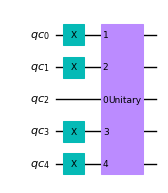

In [15]:
from qiskit import  QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.quantum_info.operators import Operator, Pauli
import numpy as np

qbits = QuantumRegister(5,"qc")

QC = QuantumCircuit(qbits)

def ControlledNotUnitary(no_of_qubits):
    ret = np.eye(2**no_of_qubits)
    
    ret[-1][-1] = 0
    ret[-1][-2] = 1
    ret[-2][-1] = 1
    ret[-2][-2] = 0    

    return ret

QC.x(4)
QC.x(1)
QC.x(0)
QC.x(3)

CCNOT = ControlledNotUnitary(5)

mq_toffoli = Operator(CCNOT)

QC.append(mq_toffoli, [2,0,1,3,4])

QC.draw(output="mpl", scale=0.5)

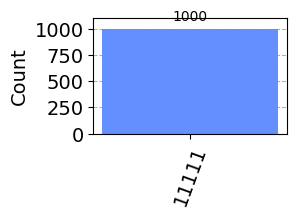

In [16]:
from qiskit import BasicAer
from qiskit.circuit import measure
from qiskit import *
from qiskit.visualization import plot_histogram

QC.measure_all()

backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(QC, backend), shots=1000).result()

counts  = result.get_counts(QC)
plot_histogram(counts, figsize=(2.5,1.5))
